<a href="https://colab.research.google.com/github/rochactivo-UPC/earthquakeEng/blob/main/Ejemplo_Lector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalar eqsig

In [ ]:
!pip install eqsig



# Importar librerías

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import eqsig.single  # https://eqsig.readthedocs.io/en/latest/
import tkinter as tk
from tkinter import filedialog
import pandas as pd
from scipy.integrate import cumtrapz
import requests

# Importar Registros de aceleración

In [ ]:
dt = 0.01
g = 9.81
scale_factor = 100 # convertir a m/s2
periods = np.linspace(0, 5, 500)  # compute the response for 1000 periods between T=0s and 5s

## Desde la WEB

Datos E: [ 0.       -0.020589 -0.041144 -0.04109  -0.041036 -0.04098  -0.040922
 -0.040863 -0.040803 -0.04074 ]
Datos N: [0.       0.013477 0.026944 0.026928 0.02691  0.026892 0.026873 0.026853
 0.026833 0.026811]


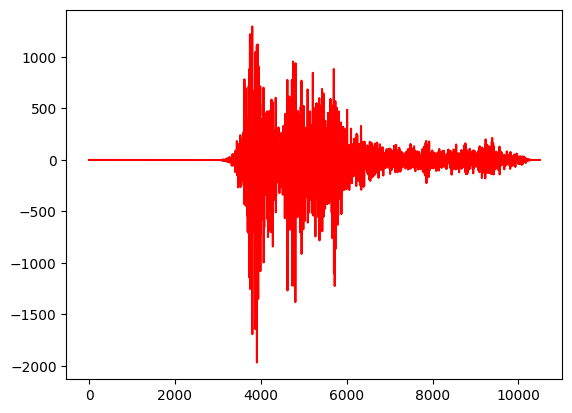

In [ ]:
import pandas as pd
import numpy as np

def cargar_datos(url):
    """ Carga los datos de una URL dada y los devuelve como un array de numpy. """
    data = pd.read_csv(url, header=None, delim_whitespace=True)
    return data.values.flatten()

# URLs de los archivos de texto
url_E = "https://raw.githubusercontent.com/rochactivo-UPC/earthquakeEng/main/E.txt"
url_N = "https://raw.githubusercontent.com/rochactivo-UPC/earthquakeEng/main/N.txt"

# Cargar los datos
acc_x = cargar_datos(url_E)
acc_y = cargar_datos(url_N)

# Mostrar los primeros 10 elementos de cada array para verificar
print("Datos E:", acc_x[:10])
print("Datos N:", acc_y[:10])



fig = plt.figure()
plt.plot(acc_x, label='x', color='red')

## Desde un archivo

In [ ]:
filename = ['/content/E.txt',
            '/content/N.txt']


acc_x = np.loadtxt(filename[0],
                   skiprows=64,
                   dtype=float)( 20/dt)

acc_y = np.loadtxt(filename[1],
                   skiprows=64,
                   dtype=float)( 20/dt)


FileNotFoundError: /content/E.txt not found.

# Generar una linea base "imperceptible"

In [ ]:
acc_ux = acc_x + 10
acc_uy = acc_y + 10

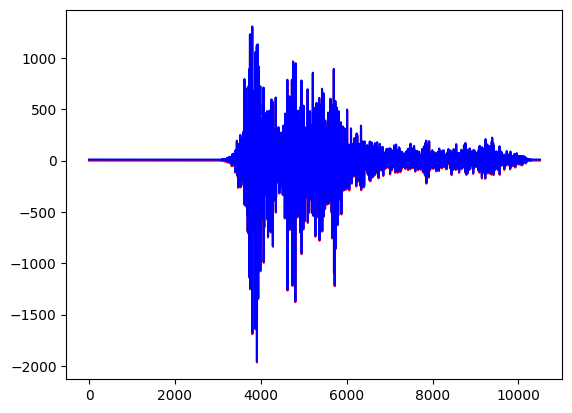

In [ ]:
fig = plt.figure()
plt.plot(acc_x, label='x', color='red')
plt.plot(acc_ux, label='y', color='blue')

# Definición de Funciones

In [ ]:
def plot_records(record_x, record_y, labelx, labely, periods):

  time_limit = 5
  amax = max(max(record_x.values),max(record_y.values))
  amin = min(min(record_x.values),min(record_y.values))


  # Calc Espectro aceelración

  record_x.generate_response_spectrum(response_times=periods,xi=0.05, min_dt_ratio=4)
  record_y.generate_response_spectrum(response_times=periods,xi=0.05, min_dt_ratio=4)


  # Calc espectro de desp y vel

  record_x.generate_displacement_and_velocity_series(trap=True)
  record_y.generate_displacement_and_velocity_series(trap=True)

  vmax = max(max(record_x.velocity),max(record_y.velocity))
  dmax = max(max(record_x.displacement),max(record_y.displacement))


  # Calc Arias

  arias_x = eqsig.im.calc_arias_intensity(record_x) # unit convertion to g
  arias_y = eqsig.im.calc_arias_intensity(record_y) # unit convertion to g

  # # Calc dur significativa
  # sd_x = eqsig.im.calc_sig_dur(record_x, start=0.05, end=0.95, im=None, se=True)
  # bd_x = eqsig.im.calc_brac_dur(record_x, 0.1, se=True)

  # eqsig.loader.save_signal(filename[0]+'_corr', record_x,0.01,filename[0])

  # creating grid for subplots
  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(10)

  ax1 = plt.subplot2grid(shape=(4, 5), loc=(0, 3), colspan=2) # Esp acc
  ax2 = plt.subplot2grid(shape=(4, 5), loc=(3, 3), colspan=1) # mov part
  ax3 = plt.subplot2grid(shape=(4, 5), loc=(0, 0), colspan=3) # acc rec
  ax4 = plt.subplot2grid(shape=(4, 5), loc=(3, 0), colspan=3) # Arias
  ax5 = plt.subplot2grid(shape=(4, 5), loc=(1, 3), colspan=2) # Esp Vel
  ax6 = plt.subplot2grid(shape=(4, 5), loc=(2, 3), colspan=2) # esp disp
  ax7 = plt.subplot2grid(shape=(4, 5), loc=(1, 0), colspan=3) # reg vel
  ax8 = plt.subplot2grid(shape=(4, 5), loc=(2, 0), colspan=3) # reg disp


  # Time series - acc
  ax3.set(xlabel='Time ($s$)', ylabel='Acceleration ($m/s^2$)')
  ax3.set(xlim=[0, max(record_x.time)], ylim=[amin*1.1, amax*1.1])
  ax3.grid()
  ax3.plot(record_x.time, record_x.values, label=labelx, color='red')
  ax3.plot(record_y.time, record_y.values, label=labely, color='blue')
  ax3.legend()
  ax3.legend(loc='best')

  # Time series - Vel
  ax7.set(xlabel='Time ($s$)', ylabel='Velocity ($m/s$)')
  ax7.set(xlim=[0, max(record_x.time)], ylim=[-vmax*1.1, vmax*1.1])
  ax7.grid()
  ax7.plot(record_x.time, record_x.velocity, label=labelx, color='red')
  ax7.plot(record_y.time, record_y.velocity, label=labely, color='blue')
  ax7.legend()
  ax7.legend(loc='best')

  # Time series - Disp
  ax8.set(xlabel='Time ($s$)', ylabel='Displacement ($m$)')
  ax8.set(xlim=[0, max(record_x.time)], ylim=[-dmax*1.1, dmax*1.1])
  ax8.grid()
  ax8.plot(record_x.time, record_x.displacement, label=labelx, color='red')
  ax8.plot(record_y.time, record_y.displacement, label=labely, color='blue')
  ax8.legend()
  ax8.legend(loc='best')

  # Arias intensity
  ax4.set(xlabel='Time ($s$)', ylabel='Arias Intenity ($m/s$)')
  ax4.set(xlim=[0, max(record_x.time)], ylim=[0, 1.1*max(max(arias_x),max(arias_y))])
  ax4.grid()
  ax4.plot(record_x.time, arias_x, label=labelx, color='red')
  ax4.plot(record_y.time, arias_y, label=labely, color='blue')
  ax4.legend()
  ax4.legend(loc='best')

  # Acc Response spectra
  ax1.set(xlabel='Period ($s$)', ylabel=' Spectral Accel. $\zeta$=5% ($m/s^2$)')
  ax1.set(xlim=[0, 10], ylim=[0, 1.1*max(max(record_x.s_a),max(record_y.s_a))])
  ax1.grid()
  ax1.plot(record_x.response_times, record_x.s_a, label=labelx, color='red')
  ax1.plot(record_y.response_times, record_y.s_a, label=labely, color='blue')
  # ax1.plot(design_spec[:,0], design_spec[:,1], label='Design Spec', color='black')
  # ax1.axvline(x = 6, color = 'green', label = 'T1')
  # ax1.axvline(x = 5, color = 'cyan', label = 'T2')
  ax1.legend()
  ax1.legend(loc='best')

  # Vel spectrum
  ax5.set(xlabel='Period ($s$)', ylabel='Spectral Vel. $\zeta$=5% ($m/s$)')
  ax5.set(xlim=[0, 10], ylim=[0, 1.1*max(max(record_x.s_v),max(record_y.s_v))])
  ax5.grid()
  ax5.plot(record_x.response_times, record_x.s_v, label=labelx, color='red')
  ax5.plot(record_y.response_times, record_y.s_v, label=labely, color='blue')
  # ax5.axvline(x = 6, color = 'green', label = 'T1')
  # ax5.axvline(x = 5, color = 'cyan', label = 'T2')
  ax5.legend()
  ax5.legend(loc='best')

  # Disp spectrum
  ax6.set(xlabel='Period ($s$)', ylabel='Spectral disp. $\zeta$=5%  ($m$)')
  ax6.set(xlim=[0, 10], ylim=[0, 1.1*max(max(record_x.s_d),max(record_y.s_d))])
  ax6.grid()
  ax6.plot(record_x.response_times, record_x.s_d, label=labelx, color='red')
  ax6.plot(record_y.response_times, record_y.s_d, label=labely, color='blue')
  # ax6.axvline(x = 6, color = 'green', label = 'T1')
  # ax6.axvline(x = 5, color = 'cyan', label = 'T2')
  ax6.legend()
  ax6.legend(loc='best')

  # Particle movement
  ax2.set(xlabel='a'+labelx+'($m/s^2$)', ylabel='a'+labely+'($m/s^2$)')
  ax2.set(xlim=[-amax, amax], ylim=[-amax, amax])
  # ax2.set(xlim=[-20, 20], ylim=[-20, 20])
  ax2.grid()
  ax2.plot(record_x.values, record_y.values, label="X-Y", color='black')
  #ax2.arrow(0, 0, amax, amax_y, width=0.01, color='black')
  #ax2.arrow(0, 0, -amax_x, -amax_y, width=0.01, color='black')
  #ax2.legend() # esto no me sirve
  #ax2.legend(loc='best') # Esto tampoco
  ax2.set_aspect('equal', 'box')

  #plt.savefig(filename[0][0:5] + '.tif')
  plt.tight_layout()
  plt.show()



def plot_record(record_x, labelx, periods):

  time_limit = 5
  amax = max(record_x.values)
  amin = min(record_x.values)


  # Calc Espectro aceelración

  record_x.generate_response_spectrum(response_times=periods,xi=0.05, min_dt_ratio=4)

  # Calc espectro de desp y vel

  record_x.generate_displacement_and_velocity_series(trap=True)

  vmax = max(record_x.velocity)
  dmax = max(record_x.displacement)


  # Calc Arias

  arias_x = eqsig.im.calc_arias_intensity(record_x) # unit convertion to g

  # # Calc dur significativa
  # sd_x = eqsig.im.calc_sig_dur(record_x, start=0.05, end=0.95, im=None, se=True)
  # bd_x = eqsig.im.calc_brac_dur(record_x, 0.1, se=True)

  # eqsig.loader.save_signal(filename[0]+'_corr', record_x,0.01,filename[0])

  # creating grid for subplots
  fig = plt.figure()
  fig.set_figheight(10)
  fig.set_figwidth(10)

  ax1 = plt.subplot2grid(shape=(4, 5), loc=(0, 3), colspan=2) # Esp acc
  ax2 = plt.subplot2grid(shape=(4, 5), loc=(3, 3), colspan=1) # mov part
  ax3 = plt.subplot2grid(shape=(4, 5), loc=(0, 0), colspan=3) # acc rec
  ax4 = plt.subplot2grid(shape=(4, 5), loc=(3, 0), colspan=3) # Arias
  ax5 = plt.subplot2grid(shape=(4, 5), loc=(1, 3), colspan=2) # Esp Vel
  ax6 = plt.subplot2grid(shape=(4, 5), loc=(2, 3), colspan=2) # esp disp
  ax7 = plt.subplot2grid(shape=(4, 5), loc=(1, 0), colspan=3) # reg vel
  ax8 = plt.subplot2grid(shape=(4, 5), loc=(2, 0), colspan=3) # reg disp


  # Time series - acc
  ax3.set(xlabel='Time ($s$)', ylabel='Acceleration ($m/s^2$)')
  ax3.set(xlim=[0, max(record_x.time)], ylim=[amin*1.1, amax*1.1])
  ax3.grid()
  ax3.plot(record_x.time, record_x.values, label=labelx, color='b')
  ax3.legend()
  ax3.legend(loc='best')

  # Time series - Vel
  ax7.set(xlabel='Time ($s$)', ylabel='Velocity ($m/s$)')
  ax7.set(xlim=[0, max(record_x.time)], ylim=[-vmax*1.1, vmax*1.1])
  ax7.grid()
  ax7.plot(record_x.time, record_x.velocity, label=labelx, color='b')
  ax7.legend()
  ax7.legend(loc='best')

  # Time series - Disp
  ax8.set(xlabel='Time ($s$)', ylabel='Displacement ($m$)')
  ax8.set(xlim=[0, max(record_x.time)], ylim=[-dmax*1.1, dmax*1.1])
  ax8.grid()
  ax8.plot(record_x.time, record_x.displacement, label=labelx, color='b')
  ax8.legend()
  ax8.legend(loc='best')

  # Arias intensity
  ax4.set(xlabel='Time ($s$)', ylabel='Arias Intenity ($m/s$)')
  ax4.set(xlim=[0, max(record_x.time)], ylim=[0, 1.1*max(arias_x)])
  ax4.grid()
  ax4.plot(record_x.time, arias_x, label=labelx, color='b')
  ax4.legend()
  ax4.legend(loc='best')

  # Acc Response spectra
  ax1.set(xlabel='Period ($s$)', ylabel=' Spectral Accel. $\zeta$=5% ($m/s^2$)')
  ax1.set(xlim=[0, max(periods)], ylim=[0, 1.1*max(record_x.s_a)])
  ax1.grid()
  ax1.plot(record_x.response_times, record_x.s_a, label=labelx, color='b')
  # ax1.plot(design_spec[:,0], design_spec[:,1], label='Design Spec', color='black')
  ax1.legend()
  ax1.legend(loc='best')

  # Vel spectrum
  ax5.set(xlabel='Period ($s$)', ylabel='Spectral Vel. $\zeta$=5% ($m/s$)')
  ax5.set(xlim=[0, max(periods)], ylim=[0, 1.1*max(record_x.s_v)])
  ax5.grid()
  ax5.plot(record_x.response_times, record_x.s_v, label=labelx, color='b')
  ax5.legend()
  ax5.legend(loc='best')

  # Disp spectrum
  ax6.set(xlabel='Period ($s$)', ylabel='Spectral disp. $\zeta$=5%  ($m$)')
  ax6.set(xlim=[0, max(periods)], ylim=[0, 1.1*max(record_x.s_d)])
  ax6.grid()
  ax6.plot(record_x.response_times, record_x.s_d, label=labelx, color='b')

  ax6.legend()
  ax6.legend(loc='best')

  plt.tight_layout()
  plt.show()

# Cálculo de parámetros

In [ ]:
record_x = eqsig.AccSignal(acc_x / scale_factor, dt, label='X')  # unit convertion to g
record_y = eqsig.AccSignal(acc_y / scale_factor, dt, label='Y')  # unit convertion to g

record_ux = eqsig.AccSignal(acc_ux / scale_factor, dt, label='UX')  # unit convertion to g
record_uy = eqsig.AccSignal(acc_uy / scale_factor, dt, label='UY')  # unit convertion to g

In [ ]:
record_x.generate_displacement_and_velocity_series(trap=True)
record_y.generate_displacement_and_velocity_series(trap=True)

record_x.correct_me
record_y.correct_me

vmax = max(max(record_x.velocity),max(record_y.velocity))
dmax = max(max(record_x.displacement),max(record_y.displacement))

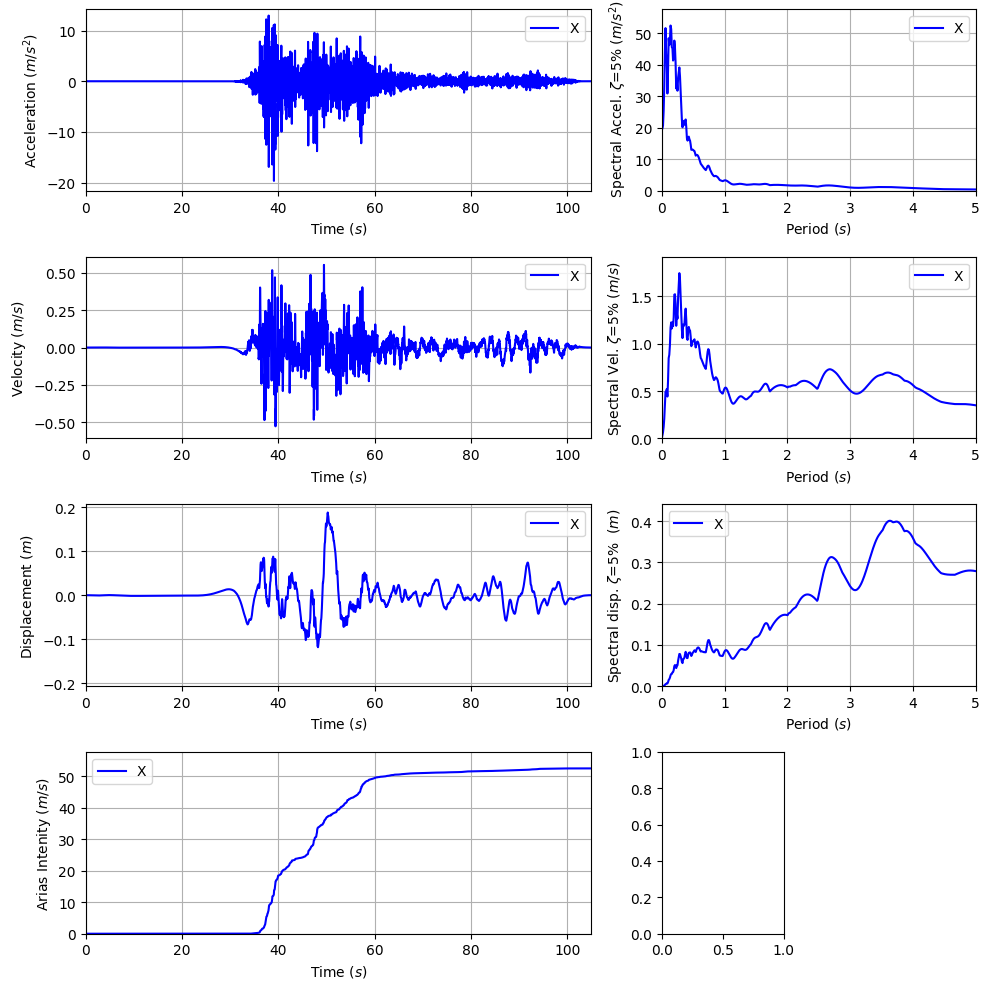

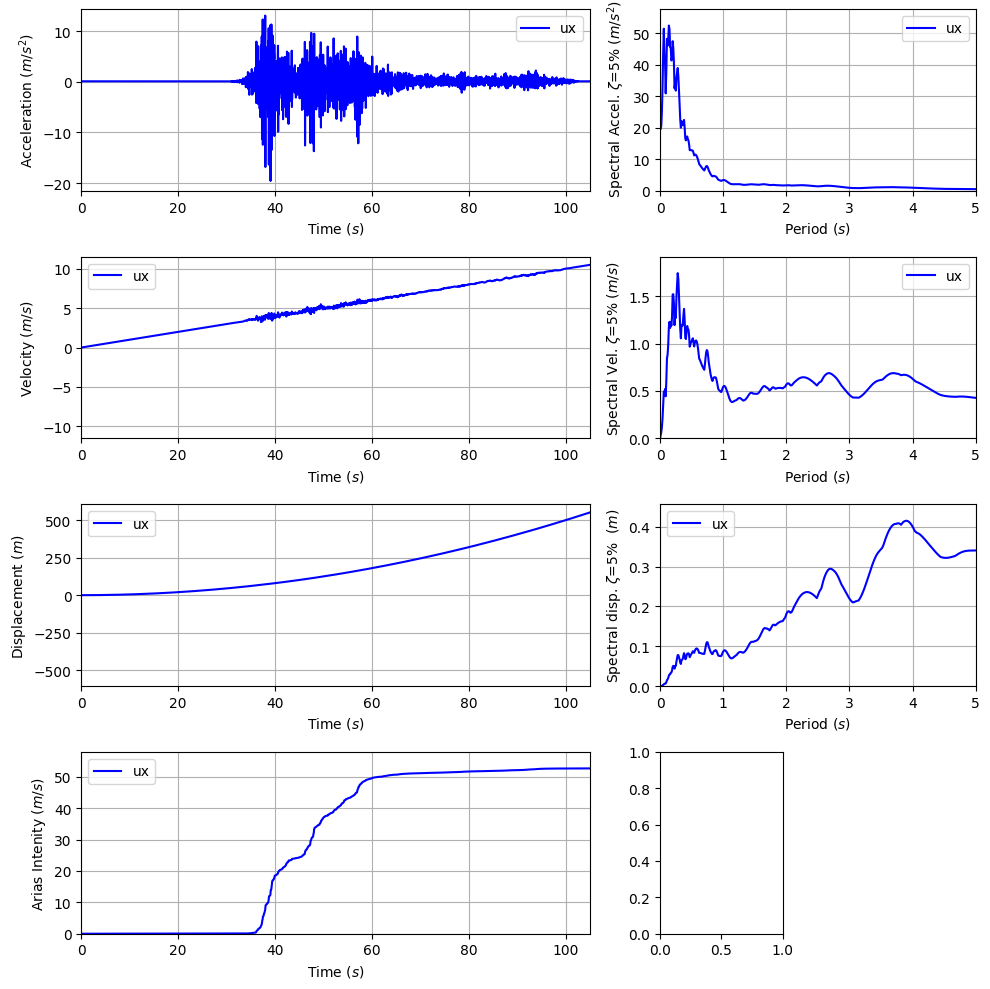

In [ ]:
plot_record(record_x, 'X', periods)
plot_record(record_ux, 'ux', periods)

In [ ]:
plot_records(record_x, record_y, 'X', 'Y', periods)
plot_records(record_ux, record_uy, 'X', 'Y', periods)

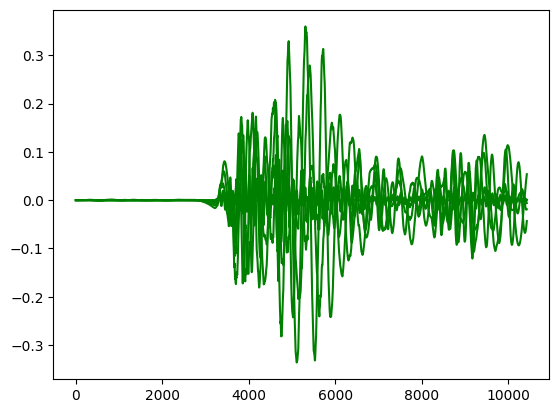

In [ ]:
# response = eqsig.sdof.single_elastic_response(record_x.values, 0.005, 0.5, 0.05)

periods = [0.001,1,2,3,4,5]
for t in periods:
  plt.plot(eqsig.sdof.single_elastic_response(record_x.values, 0.01, t, 0.05), label='x', color='green')

# Figura 3d

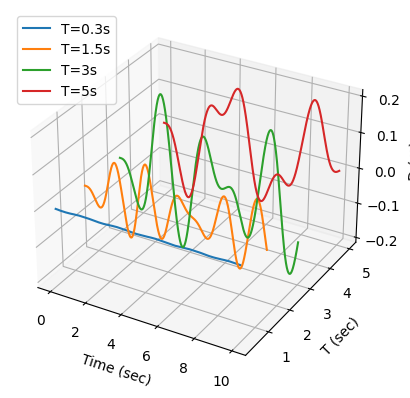

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calcular_respuesta(m, c, k, acc, dt):
    """ Calcula la respuesta usando el método de Newmark. """
    n = len(acc)
    d = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)

    # Parámetros de Newmark
    gamma = 0.5
    beta = 0.25

    # Coeficientes efectivos
    a0 = 1 / (beta * dt**2) * m + gamma / (beta * dt) * c
    a1 = 1 / (beta * dt) * m + (gamma / beta - 1) * c
    a2 = (1 / (2 * beta) - 1) * m + dt * (gamma / (2 * beta) - 1) * c
    k_eff = k + a0

    # Paso inicial
    p = -m * acc  # Fuerza equivalente
    a[0] = (p[0] - c * v[0] - k * d[0]) / m

    for i in range(1, n):
        p_eff = p[i] + a0 * d[i-1] + a1 * v[i-1] + a2 * a[i-1]
        d[i] = p_eff / k_eff
        v[i] = gamma / (beta * dt) * (d[i] - d[i-1]) + (1 - gamma / beta) * v[i-1] + dt * (1 - gamma / (2 * beta)) * a[i-1]
        a[i] = (d[i] - d[i-1]) / (beta * dt**2) - v[i-1] / (beta * dt) - a[i-1] * (1 / (2 * beta) - 1)

    return d, v, a

def graficar_respuesta_3d(periodos, acc, dt):
    m = 1.0  # Masa en kg
    c = 0.05  # Amortiguamiento en Ns/m

    t = np.arange(0, len(acc) * dt, dt)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for T in periodos:
        k = (2 * np.pi / T)**2 * m  # Rigidez para el periodo T
        d, _, _ = calcular_respuesta(m, c, k, acc, dt)
        ax.plot(t, [T] * len(t), d, label=f'T={T}s')

    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('T (sec)')
    ax.set_zlabel('D (m)')
    # plt.title('3D Response Spectrum')
    plt.legend()
    plt.show()

# Ejemplo de uso
dt = 0.01
t_total = 10
t = np.arange(0, t_total, dt)
acc = 0.5 * np.sin(2 * np.pi * 0.5 * t)  # Aceleración con 0.5 Hz de frecuencia
# t = record_x.time
# acc = record_ux.values

periodos = [0.3, 1.5, 3, 5]  # Periodos de interés
graficar_respuesta_3d(periodos, acc, dt)


# Figura 3d 2

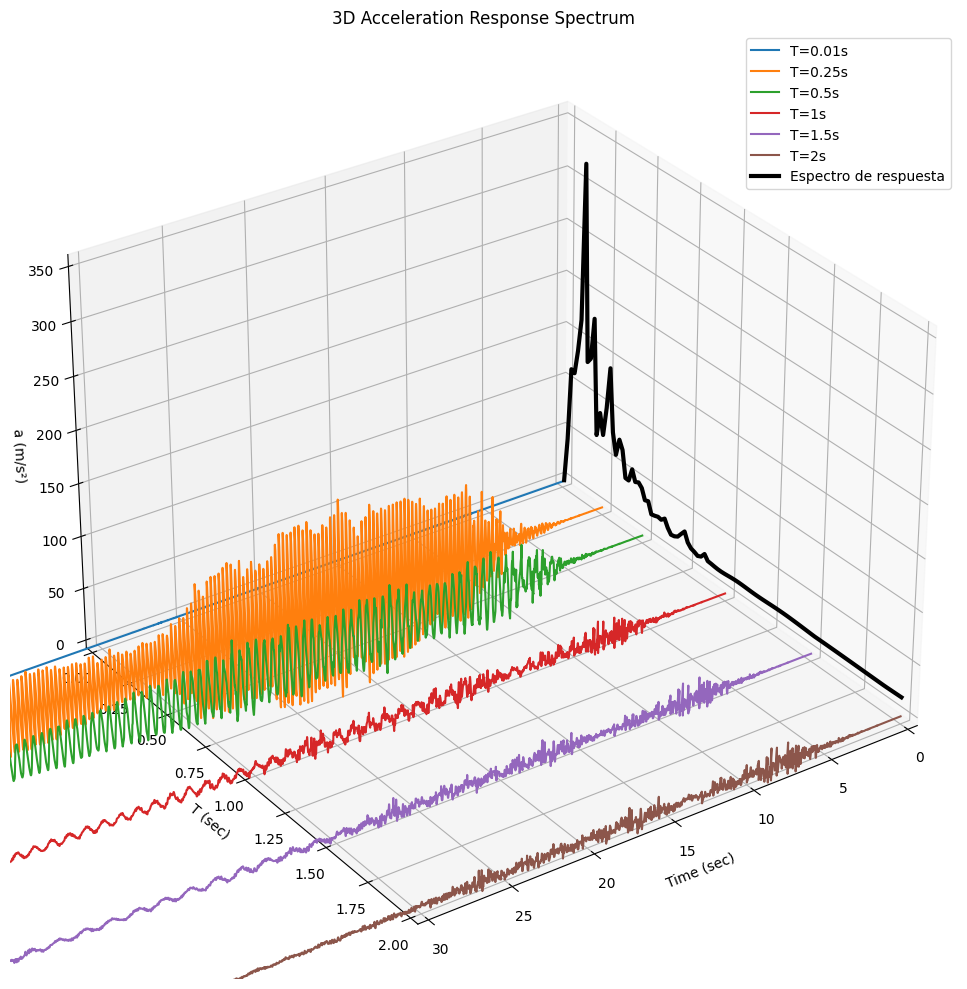

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calcular_respuesta_aceleracion(m, c, k, acc, dt):
    n = len(acc)
    d = np.zeros(n)
    v = np.zeros(n)
    a = np.zeros(n)
    gamma = 0.5
    beta = 0.25
    a0 = 1 / (beta * dt**2) * m + gamma / (beta * dt) * c
    a1 = 1 / (beta * dt) * m + (gamma / beta - 1.0) * c
    a2 = (1 / (2.0 * beta) - 1.0) * m + dt * (gamma / (2.0 * beta) - 1.0) * c
    k_eff = k + a0

    p = -m * acc
    a[0] = (p[0] - c * v[0] - k * d[0]) / m

    for i in range(1, n):
        p_eff = p[i] + a0 * d[i-1] + a1 * v[i-1] + a2 * a[i-1]
        d[i] = p_eff / k_eff
        v[i] = gamma / (beta * dt) * (d[i] - d[i-1]) + (1 - gamma / beta) * v[i-1] + dt * (1 - gamma / (2 * beta)) * a[i-1]
        a[i] = (d[i] - d[i-1]) / (beta * dt**2) - v[i-1] / (beta * dt) - a[i-1] * (1 / (2 * beta) - 1)

    return a

def graficar_respuesta_aceleracion_3d(periodos, acc, dt):
    m = 1.0  # Masa en kg
    c = 0.05  # Amortiguamiento en Ns/m

    t = np.arange(0, len(acc) * dt, dt)
    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax = fig.add_subplot(111, projection='3d')

    for T in periodos:
        k = (2 * np.pi / T)**2 * m  # Calculate stiffness for the period T
        a_resp = calcular_respuesta_aceleracion(m, c, k, acc, dt)
        ax.plot(t, [T] * len(t), a_resp, label=f'T={T}s')

    # Añadir espectro de respuesta completo en t=0
    max_accelerations = []
    for T in np.linspace(min(periodos), max(periodos), 100):
        k = (2 * np.pi / T)**2 * m
        a_resp = calcular_respuesta_aceleracion(m, c, k, acc, dt)
        max_accelerations.append(max(abs(a_resp)))

    ax.plot([0]*100, np.linspace(min(periodos), max(periodos), 100), max_accelerations, color='k', linewidth=3, label='Espectro de respuesta')

    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('T (sec)')
    ax.set_zlabel('  a (m/s²)')
    ax.set_xlim([0,30])
    ax.set_ylim([0,max(periodos)])
    ax.set_zlim([0,max(max_accelerations)*1.1])
    plt.title('3D Acceleration Response Spectrum')
    plt.legend()
    # Configura la perspectiva de visualización
    ax.view_init(elev=30, azim=55)  # Ajusta los valores según necesites
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
dt = 0.01
t = record_x.time[3000 :]
acc = record_ux.values[3000 :]
# t_total = 10
# t = np.arange(0, t_total, dt)
# acc = 0.5 * np.sin(2 * np.pi * 0.5 * t)  # Example ground acceleration
periodos = [0.01, 0.25, 0.5, 1, 1.5, 2]  # Periods of interest
graficar_respuesta_aceleracion_3d(periodos, acc, dt)


<ipython-input-24-7c257f043e7e>:70: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  response_point.set_data(t[i], x[i])  # Actualizar el punto de la respuesta


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '800x600', '-pix_fmt', 'rgba', '-r', '20.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmp26jh95hv/temp.m4v']' returned non-zero exit status 255.

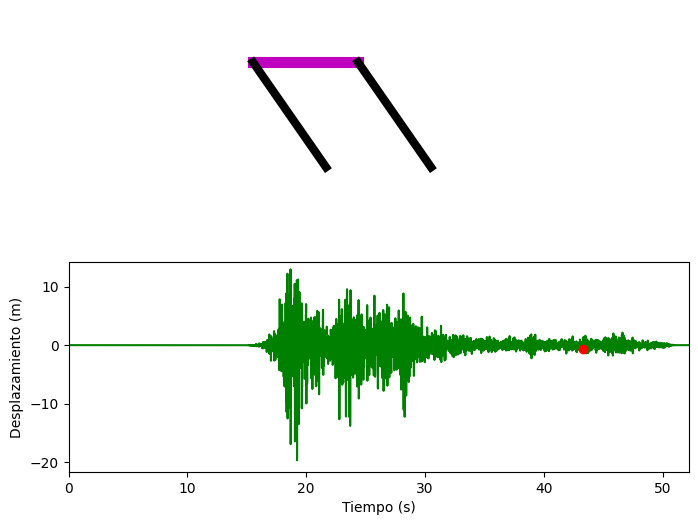

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def respuesta_oscilador(m, c, k, F0, omega, t):
    omega_n = np.sqrt(k / m)  # Frecuencia natural no amortiguada
    zeta = c / (2 * np.sqrt(m * k))  # Razón de amortiguamiento

    A = F0 / np.sqrt((k - m * omega**2)**2 + (c * omega)**2)
    phi = np.arctan((c * omega) / (k - m * omega**2))
    x = A * np.cos(omega * t - phi)

    return x

def main():
    m = 1.0  # Masa en kg
    c = 0.1  # Amortiguamiento en Ns/m
    k = 2.0  # Rigidez en N/m
    F0 = 1.0  # Amplitud de la fuerza externa en N
    omega = 1.5  # Frecuencia angular de la fuerza externa en rad/s
    scale = 0.1

    dt = 0.01
    # t = np.arange(0, 10, dt)
    # x = respuesta_oscilador(m, c, k, F0, omega, t) * scale
    t = record_x.time
    x = record_x.values



    fig = plt.figure(figsize=(8, 6))
    ax1 = plt.subplot(2, 1, 1)
    ax2 = plt.subplot(2, 1, 2)

    # Configurar el primer subplot para el oscilador
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_aspect('equal')
    ax1.axis('off')

    # Configurar el segundo subplot para la gráfica de respuesta
    ax2.set_xlim(0, max(t))
    ax2.set_ylim(min(x) * 1.1, max(x) * 1.1)
    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Desplazamiento (m)')
    response_line, = ax2.plot(t, x, 'g-')
    response_point, = ax2.plot([], [], 'ro')

    # Elementos del portal
    horizontal_beam, = ax1.plot([], [], 'm-', linewidth=8)
    left_column, = ax1.plot([], [], 'k-', linewidth=6)
    right_column, = ax1.plot([], [], 'k-', linewidth=6)

    left_base = -0.5
    right_base = 0.5

    def init():
        horizontal_beam.set_data([], [])
        left_column.set_data([], [])
        right_column.set_data([], [])
        response_point.set_data([], [])
        return horizontal_beam, left_column, right_column, response_point

    def animate(i):
        # Actualiza las posiciones de los elementos del portal
        horizontal_beam.set_data([x[i] + left_base, x[i] + right_base], [1, 1])
        left_column.set_data([x[i] + left_base, left_base], [1, 0])
        right_column.set_data([x[i] + right_base, right_base], [1, 0])
        response_point.set_data(t[i], x[i])  # Actualizar el punto de la respuesta
        return horizontal_beam, left_column, right_column, response_point

    ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True, interval=50)

    html = HTML(ani.to_html5_video())
    display(html)
    plt.close(fig)

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def respuesta_oscilador(m, c, k, acc, dt):
    """
    Calcula la respuesta del oscilador usando el método de Newmark para un registro de aceleración.

    Parámetros:
    - m: masa del oscilador.
    - c: coeficiente de amortiguamiento.
    - k: rigidez.
    - acc: registro de aceleración (array).
    - dt: paso de tiempo del registro de aceleración.

    Retorna:
    - desplazamiento: array de desplazamientos calculados.
    """
    n = len(acc)
    # Inicialización de vectores
    d = np.zeros(n)  # Desplazamiento
    v = np.zeros(n)  # Velocidad
    a = np.zeros(n)  # Aceleración

    # Parámetros de Newmark
    gamma = 0.5
    beta = 0.25

    # Coeficientes efectivos
    a0 = 1.0 / (beta * dt**2) * m + gamma / (beta * dt) * c
    a1 = 1.0 / (beta * dt) * m + (gamma / beta - 1.0) * c
    a2 = (1.0 / (2.0 * beta) - 1.0) * m + dt * (gamma / (2.0 * beta) - 1.0) * c
    k_eff = k + a0
    # Paso inicial
    p = -m * acc  # Fuerza equivalente
    a[0] = (p[0] - c * v[0] - k * d[0]) / m

    for i in range(1, n):
        p_eff = p[i] + a0 * d[i-1] + a1 * v[i-1] + a2 * a[i-1]
        d[i] = p_eff / k_eff
        v[i] = gamma / (beta * dt) * (d[i] - d[i-1]) + (1 - gamma / beta) * v[i-1] + dt * (1 - gamma / (2 * beta)) * a[i-1]
        a[i] = (d[i] - d[i-1]) / (beta * dt**2) - v[i-1] / (beta * dt) - a[i-1] * (1 / (2 * beta) - 1)

    return d, v, a


def main():
    m = 1  # Masa en kg
    c = 0.05  # Amortiguamiento en Ns/m
    k = 100  # Rigidez en N/m
    dt = 0.05  # Paso de tiempo en segundos
    t = np.arange(0, 10, dt)

    # Generar un registro de aceleración sintético (puede reemplazarse por un registro real)
    acc = 0.5 * np.sin(2 * np.pi * 1 * t)  # Aceleración con 1 Hz de frecuencia

    # Calcular la respuesta del sistema
    desplazamiento, velocidad, aceleracion = respuesta_oscilador(m, c, k, acc, dt)

    fig = plt.figure(figsize=(10 ,5))
    ax1 = plt.subplot(2, 2, (1,3))
    ax2 = plt.subplot(2, 2, 2)
    ax3 = plt.subplot(2, 2, 4)

    # Configuración de la animación
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-0.5, 1.5)
    ax1.set_aspect('equal')
    ax1.axis('off')


    ax2.set_xlim(0, max(t))
    # ax2.set_ylim(min(aceleracion) * 1.1, max(aceleracion) * 1.1)
    ax2.set_ylim(-1, 1)

    ax2.set_xlabel('Tiempo (s)')
    ax2.set_ylabel('Oscilador')
    response_line, = ax2.plot(t, aceleracion, 'g-')
    response_point, = ax2.plot([], [], 'ro')

    ax3.set_xlim(0, max(t))
    # ax3.set_ylim(min(acc) * 1.1, max(acc) * 1.1)
    ax3.set_ylim(-1,1)

    ax3.set_xlabel('Tiempo (s)')
    ax3.set_ylabel('Base')
    response_line2, = ax3.plot(t, -acc, 'g-')
    response_point2, = ax3.plot([], [], 'bo')


    horizontal_beam, = ax1.plot([], [], 'm-', linewidth=10)
    left_column, = ax1.plot([], [], 'k-', linewidth=6)
    right_column, = ax1.plot([], [], 'k-', linewidth=6)

    left_base = -0.5
    right_base = 0.5
    height = 1.5

    def init():
        horizontal_beam.set_data([], [])
        left_column.set_data([], [])
        right_column.set_data([], [])
        response_point.set_data([], [])
        return horizontal_beam, left_column, right_column, response_point

    # def animate(i):
    #     horizontal_beam.set_data([desplazamiento[i] + left_base, desplazamiento[i] + right_base], [1, 1])
    #     left_column.set_data([desplazamiento[i]+left_base, left_base], [1, 0])
    #     right_column.set_data([desplazamiento[i]+right_base, right_base], [1, 0])
    #     response_point.set_data(t[i], desplazamiento[i])
    #     return horizontal_beam, left_column, right_column, response_point

    def animate(i):
        horizontal_beam.set_data([aceleracion[i] + left_base, aceleracion[i] + right_base], [height, height])
        left_column.set_data([aceleracion[i]+left_base, left_base], [height, 0])
        right_column.set_data([aceleracion[i]+right_base, right_base], [height, 0])
        response_point.set_data(t[i], aceleracion[i])
        response_point2.set_data(t[i], -acc[i])
        return horizontal_beam, left_column, right_column, response_point

    ani = FuncAnimation(fig, animate, frames=len(t), init_func=init, blit=True, interval=50)

    html = HTML(ani.to_html5_video())
    display(html)
    plt.tight_layout()
    plt.close(fig)

if __name__ == "__main__":
    main()


<ipython-input-73-97eaedf116d4>:118: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  response_point.set_data(t[i], aceleracion[i])
<ipython-input-73-97eaedf116d4>:119: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  response_point2.set_data(t[i], -acc[i])


# Ejemplo de Integral de Duhamel

In [ ]:
!pip install numpy matplotlib ipywidgets

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def duhamel_integral(m, c, k, acc, dt):
    n = len(acc)
    omega_n = np.sqrt(k / m)
    zeta = c / (2 * np.sqrt(k * m))
    omega_d = omega_n * np.sqrt(1 - zeta**2)

    x = np.zeros(n)
    v = np.zeros(n)

    for i in range(1, n):
        integral = 0
        for j in range(i):
            integral += np.exp(-zeta * omega_n * (i - j) * dt) * np.sin(omega_d * (i - j) * dt) * acc[j] * dt
        x[i] = integral * (1 / (m * omega_d))
        v[i] = (x[i] - x[i-1]) / dt

    return x, v

def plot_response(m=1.0, c=0.05, k=20.0):
    dt = 0.02
    w=1
    t = np.linspace(0, 100, int(10/dt))
    acc = 10* np.sin(w*t)  # Example ground acceleration

    x, _ = duhamel_integral(m, c, k, acc, dt)

    plt.figure(figsize=(15, 4))
    plt.plot(t, x, label='System Response')
    plt.plot(t,acc,label='input')
    plt.title('System Response to a Dynamic Load')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (m)')
    plt.legend()
    plt.xlim(0,100)
    # plt.ylim(-1,1)
    plt.grid(True)
    plt.show()

# Widget interactivo para cambiar parámetros
interact(plot_response, m=FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1),
         c=FloatSlider(value=0.05, min=0.001, max=0.2, step=0.01),
         k=FloatSlider(value=1, min=0.1, max=100.0, step=1.0))

interactive(children=(FloatSlider(value=1.0, description='m', max=10.0, min=0.1), FloatSlider(value=0.05, desc…

<function __main__.plot_response(m=1.0, c=0.05, k=20.0)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def duhamel_integral(m, c, k, acc, dt):
    n = len(acc)
    omega_n = np.sqrt(k / m)
    zeta = c / (2 * np.sqrt(k * m))
    omega_d = omega_n * np.sqrt(1 - zeta**2)

    x = np.zeros(n)

    for i in range(1, n):
        integral = 0
        for j in range(i):
            integral += np.exp(-zeta * omega_n * (i - j) * dt) * np.sin(omega_d * (i - j) * dt) * acc[j] * dt
        x[i] = integral * (1 / (m * omega_d))

    return x

def plot_response(m=1.0, c=0.05, k=20.0):
    dt = 0.02
    t = np.linspace(0, 10, int(10/dt))
    acc = 0.5 * np.sin(2 * np.pi * 0.5 * t)  # Example ground acceleration

    x = duhamel_integral(m, c, k, acc, dt)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Plotting the input acceleration
    ax1.plot(t, acc, label='Input Acceleration', color='blue')
    ax1.set_title('Input Ground Acceleration')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Acceleration (m/s²)')
    ax1.legend()
    ax1.grid(True)

    # Plotting the system response
    ax2.plot(t, x, label='System Response', color='red')
    ax2.set_title('System Response to Dynamic Load')
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Displacement (m)')
    ax2.legend()
    ax2.grid(True)

    # Displaying parameters
    textstr = '\n'.join((
        f'Mass (m): {m} kg',
        f'Damping (c): {c} Ns/m',
        f'Stiffness (k): {k} N/m'
    ))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # Place a text box in upper left in axes coords
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=14,
             verticalalignment='top', bbox=props)

    plt.tight_layout()
    plt.show()

# Widget interactivo para cambiar parámetros
interact(plot_response, m=FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1, description='Mass (kg)'),
         c=FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Damping (Ns/m)'),
         k=FloatSlider(value=20.0, min=1.0, max=100.0, step=1.0, description='Stiffness (N/m)'))


interactive(children=(FloatSlider(value=1.0, description='Mass (kg)', max=2.0, min=0.1), FloatSlider(value=0.0…

<function __main__.plot_response(m=1.0, c=0.05, k=20.0)>

In [ ]:
def plot_response(period=1.0, xi=0.05):
    # Simulation settings
    step = 0.02
    t_total = 10
    t = np.linspace(0, t_total, int(t_total/step))
    motion = 0.5 * np.sin(2 * np.pi * 0.5 * t)  # Example ground acceleration

    disp, time = single_elastic_response(motion, step, period, xi)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plotting the input acceleration
    axs[0].plot(t, motion, label='Input Acceleration', color='blue')
    axs[0].set_title('Input Ground Acceleration')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Acceleration (m/s²)')
    axs[0].legend()
    axs[0].grid(True)

    # Plotting the system response
    axs[1].plot(time, disp, label='System Response', color='red')
    axs[1].set_title('System Response to Dynamic Load')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Displacement (m)')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

def single_elastic_response(motion, step, period, xi):
    w_n = (2.0 * np.pi) / period
    w_d = w_n * np.sqrt(1 - xi ** 2)
    x_w_n = xi * w_n
    length = len(motion)
    time = step * np.arange(length)
    disp = np.zeros(length)

    exp_decay = np.exp(-x_w_n * time)
    sin_response = np.sin(w_d * time)

    for i in range(length):
        impulse_response = exp_decay[:length-i] * sin_response[:length-i]
        disp[i:] += motion[i] * step / w_d * impulse_response

    return disp, time


# Interactive widget setup
interact(plot_response,
         period=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Natural Period (s)'),
         xi=FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Damping Ratio'))


interactive(children=(FloatSlider(value=1.0, description='Natural Period (s)', max=5.0, min=0.1), FloatSlider(…

<function __main__.plot_response(period=1.0, xi=0.05)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox

def single_elastic_response(motion, step, period, xi):
    w_n = (2.0 * np.pi) / period
    w_d = w_n * np.sqrt(1 - xi ** 2)
    x_w_n = xi * w_n
    length = len(motion)
    time = step * np.arange(length)
    disp = np.zeros(length)

    exp_decay = np.exp(-x_w_n * time)
    sin_response = np.sin(w_d * time)

    for i in range(length):
        impulse_response = exp_decay[:length-i] * sin_response[:length-i]
        disp[i:] += motion[i] * step / w_d * impulse_response

    return disp, time

def plot_response(period=1.0, xi=0.05, is_impulse=False):
    step = 0.02
    t_total = 10
    t = np.linspace(0, t_total, int(t_total/step))

    if is_impulse:
        motion = np.zeros_like(t)
        motion[0] = 1 / step  # Impulse at t=0, scaled by 1/step to simulate impulse integral
    else:
        motion = 0.5 * np.sin(2 * np.pi * 0.5 * t)  # Example ground acceleration

    disp, time = single_elastic_response(motion, step, period, xi)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plotting the input acceleration
    axs[0].plot(t, motion, label='Input Acceleration', color='blue')
    axs[0].set_title('Input Ground Acceleration')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Acceleration (m/s²)')
    axs[0].legend()
    axs[0].grid(True)

    # Plotting the system response
    axs[1].plot(time, disp, label='System Response', color='red')
    axs[1].set_title('System Response to Dynamic Load')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Displacement (m)')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widget setup
interact(plot_response,
         period=FloatSlider(value=1.0, min=0.01, max=5.0, step=0.1, description='Natural Period (s)'),
         xi=FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Damping Ratio'),
         is_impulse=Checkbox(value=False, description='Impulse Input'))


interactive(children=(FloatSlider(value=1.0, description='Natural Period (s)', max=5.0, min=0.01), FloatSlider…

<function __main__.plot_response(period=1.0, xi=0.05, is_impulse=False)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox

def single_elastic_response(motion, step, period, xi):
    w_n = (2.0 * np.pi) / period
    w_d = w_n * np.sqrt(1 - xi ** 2)
    x_w_n = xi * w_n
    length = len(motion)
    time = step * np.arange(length)
    disp = np.zeros(length)

    exp_decay = np.exp(-x_w_n * time)
    sin_response = np.sin(w_d * time)

    for i in range(length):
        impulse_response = exp_decay[:length-i] * sin_response[:length-i]
        disp[i:] += motion[i] * step / w_d * impulse_response

    return disp, time

def plot_response(period=1.0, xi=0.05, is_impulse=False, input_period=2.0):
    step = 0.02
    t_total = 10
    t = np.linspace(0, t_total, int(t_total/step))

    if is_impulse:
        motion = np.zeros_like(t)
        motion[0] = 1 / step  # Impulse at t=0, scaled by 1/step to simulate impulse integral
    else:
        motion = 0.5 * np.sin(2 * np.pi / input_period * t)  # Dynamic ground acceleration with adjustable period

    disp, time = single_elastic_response(motion, step, period, xi)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plotting the input acceleration
    axs[0].plot(t, motion, label='Input Acceleration', color='blue')
    axs[0].set_title('Input Ground Acceleration')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Acceleration (m/s²)')
    axs[0].legend()
    axs[0].grid(True)

    # Plotting the system response
    axs[1].plot(time, disp, label='System Response', color='red')
    axs[1].set_title('System Response to Dynamic Load')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Displacement (m)')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widget setup
interact(plot_response,
         period=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Natural Period (s)'),
         xi=FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Damping Ratio'),
         is_impulse=Checkbox(value=False, description='Impulse Input'),
         input_period=FloatSlider(value=2.0, min=0.5, max=10.0, step=0.1, description='Input Signal Period (s)'))


interactive(children=(FloatSlider(value=1.0, description='Natural Period (s)', max=5.0, min=0.1), FloatSlider(…

<function __main__.plot_response(period=1.0, xi=0.05, is_impulse=False, input_period=2.0)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Checkbox

def single_elastic_response(motion, step, period, xi):
    w_n = (2.0 * np.pi) / period
    w_d = w_n * np.sqrt(1 - xi ** 2)
    x_w_n = xi * w_n
    length = len(motion)
    time = step * np.arange(length)
    disp = np.zeros(length)

    exp_decay = np.exp(-x_w_n * time)
    sin_response = np.sin(w_d * time)

    for i in range(length):
        impulse_response = exp_decay[:length-i] * sin_response[:length-i]
        disp[i:] += motion[i] * step / w_d * impulse_response

    return disp, time

def plot_response(period=1.0, xi=0.05, is_impulse=False, input_period=2.0,
                  ylim_acc=(-1, 1), ylim_disp=(-1, 1)):
    step = 0.02
    t_total = 10
    t = np.linspace(0, t_total, int(t_total/step))

    if is_impulse:
        motion = np.zeros_like(t)
        motion[0] = 1 / step  # Impulse at t=0, scaled by 1/step to simulate impulse integral
    else:
        motion = 0.5 * np.sin(2 * np.pi / input_period * t)  # Dynamic ground acceleration with adjustable period

    disp, time = single_elastic_response(motion, step, period, xi)

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plotting the input acceleration
    axs[0].plot(t, motion, label='Input Acceleration', color='blue')
    axs[0].set_title('Input Ground Acceleration')
    axs[0].set_xlabel('Time (s)')
    axs[0].set_ylabel('Acceleration (m/s²)')
    axs[0].set_ylim((-ylim_acc,ylim_acc))
    axs[0].legend()
    axs[0].grid(True)

    # Plotting the system response
    axs[1].plot(time, disp, label='System Response', color='red')
    axs[1].set_title('System Response to Dynamic Load')
    axs[1].set_xlabel('Time (s)')
    axs[1].set_ylabel('Displacement (m)')
    axs[1].set_ylim((-ylim_disp,ylim_disp))
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Interactive widget setup
interact(plot_response,
         period=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Natural Period (s)'),
         xi=FloatSlider(value=0.05, min=0.01, max=0.2, step=0.01, description='Damping Ratio'),
         is_impulse=Checkbox(value=False, description='Impulse Input'),
         input_period=FloatSlider(value=2.0, min=0.5, max=10.0, step=0.1, description='Input Signal Period (s)'),
         ylim_acc=FloatSlider(value=3, min=0.1, max=5, step=0.1, description='Y-Lim Acceleration'),
         ylim_disp=FloatSlider(value=0.1, min=0.05, max=5, step=0.05, description='Y-Lim Displacement'))


interactive(children=(FloatSlider(value=1.0, description='Natural Period (s)', max=5.0, min=0.1), FloatSlider(…

<function __main__.plot_response(period=1.0, xi=0.05, is_impulse=False, input_period=2.0, ylim_acc=(-1, 1), ylim_disp=(-1, 1))>